In [286]:
import os, re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from konlpy.tag import Okt
from collections import Counter

okt=Okt()

In [2]:
PATH='/root/workspace/data/'
catagory=pd.read_csv(PATH+'catagory_num.csv', encoding='utf-8')

In [21]:
cata_list=[catagory[catagory.catagory==i].shop.values.tolist() for i in range(16)]

In [78]:
chicken=pd.read_csv(PATH+'chicken.csv', encoding='utf-8')
pizza=pd.read_csv(PATH+'pizza.csv', encoding='utf-8')
china=pd.read_csv(PATH+'china.csv', encoding='utf-8')
korea=pd.read_csv(PATH+'korea.csv', encoding='utf-8')
japan=pd.read_csv(PATH+'japan.csv', encoding='utf-8')
pig=pd.read_csv(PATH+'pig.csv', encoding='utf-8')
tteok=pd.read_csv(PATH+'tteok.csv', encoding='utf-8')
cafe=pd.read_csv(PATH+'cafe.csv', encoding='utf-8')

In [81]:
chicken_shop=chicken.shop.unique().tolist()
pizza_shop=pizza.shop.unique().tolist()
china_shop=china.shop.unique().tolist()
korea_shop=korea.shop.unique().tolist()
japan_shop=japan.shop.unique().tolist()
pig_shop=pig.shop.unique().tolist()
tteok_shop=tteok.shop.unique().tolist()
cafe_shop=cafe.shop.unique().tolist()

In [109]:
shop_list=[chicken,pizza,korea,japan,pig,tteok,cafe]

In [194]:
catagory6=pd.DataFrame
for num in cata_list[6]:
    for cata in shop_list:
        now=cata[cata.shop==num]
        if catagory6.empty:
            catagory6=now
        else:
            catagory6=catagory6.append(now)
        


In [215]:
def cluster(i):
    catagory=pd.DataFrame
    for num in cata_list[i]:
        for cata in shop_list:
            now=cata[cata.shop==num]
            if catagory.empty:
                catagory=now
            else:
                catagory=catagory.append(now)
    
    catagory.reset_index(drop=True,inplace=True)
    
    return catagory

In [218]:
for i in range(6,16):
    globals()[f'catagory{i}']=cluster(i)

In [219]:
catagory6

,shop,name,date,star_flavor,star_volume,star_deliver,menu,review_customer,review_owner,img_name
0,썬더치킨-경희대점,sa**님,2020년 9월 8일,5.0,5.0,5.0,"파닭치킨/1(뼈or순살 선택(뼈),반마리 추가 선택(매운맛 양념치킨 반마리 추가),...",썬더치킨은 언제나 맞습니다!!!,NaN,썬더치킨-경희대점_0
1,썬더치킨-경희대점,ja**님,2020년 8월 27일,5.0,5.0,5.0,"반반치킨（크리스피 반＋양념 반）/1(뼈or순살 선택(뼈),사이드 추가 선택(마약떡튀...",맛잇고 양많거 좋아여,NaN,썬더치킨-경희대점_1
2,썬더치킨-경희대점,be**님,2020년 8월 20일,5.0,5.0,5.0,크리스피치킨/1(뼈or순살 선택(뼈)),배달도 빠르고 맛있어요 서비스 감자도 최고~,NaN,썬더치킨-경희대점_2
3,썬더치킨-경희대점,lw**님,2020년 8월 11일,5.0,5.0,5.0,"반반치킨（크리스피 반＋양념 반）/1(뼈or순살 선택(뼈),반마리 추가 선택(간장치킨...",비도 많이 왔는데 배달 빨리 해주셔서 감사했습니다 물론 치킨이랑 감자튀김도 더할 나...,NaN,썬더치킨-경희대점_3
4,썬더치킨-경희대점,na**님,2020년 8월 6일,5.0,5.0,5.0,"닭다리 반반 8조각（후라이드 반＋양념 반）/1(뼈or순살 선택(뼈),소스 추가 선택...",닭다리 너무 맛있고요\n감자튀김이 진짜 너무 맛있어요 감튀 강추입니다,NaN,썬더치킨-경희대점_4
...,...,...,...,...,...,...,...,...,...,...
1054,도야족발-중곡본점,70**님,2020년 2월 10일,5.0,5.0,5.0,불족발/1(사이즈 선택(中)),와우~~~~ 족발집 중에 최고인거 같아요\n집에서 조금 멀어서 음식이 식을까 걱정...,감사합니다 기억나요 껍대기 위주로 달라고하셔서 사실 그거 ..2족이나 들어간건 비밀...,도야족발-중곡본점_495
1055,도야족발-중곡본점,bu**님,2020년 2월 9일,5.0,5.0,5.0,도야보쌈/1(사이즈 선택(小)),배달시켜먹어본 족발중 최고였어요!!♡\n돼지냄새도 안나고 쫄깃쫄깃 너무맛있어요~~\...,감사합니다 ㅎㅎㅎ 항상 신선한 당일족으로만 삶아서 쫄깃 쫄깃 하실꺼에요 ㅎㅎㅎ \n...,NaN
1056,도야족발-중곡본점,손님,2020년 2월 8일,5.0,5.0,5.0,도야보쌈/1(사이즈 선택(小)),"보쌈 먹어봤는데, 요즘 되게 부드럽네요 육질이나 육즙이나 모든 면에서 최고라 생각합...",저희 도야족발주문해주셔서 감사합니다 ㅎㅎ 보쌈 맛나죠 이번에 고기도 업그레이드 해서...,NaN
1057,도야족발-중곡본점,na**님,2020년 2월 4일,2.0,1.0,3.0,반반족발/1(메뉴 선택(반반 앞발)),전에 시켜먹었을때 맛있게 먹었던 기억이 있어서 일부러 여기서 시켰는데.. 주인이 바...,죄송합니다..고객님...주인이 바낀건아니구요..ㅠㅠ 말슴주신부분에대해 변명안하겠습니...,도야족발-중곡본점_498


In [162]:
catagory1.nunique()

shop                  26
name                 804
date                1740
star_flavor            5
star_volume            5
star_deliver           5
menu                6060
review_customer    17324
review_owner        8000
img_name           10872
dtype: int64

In [134]:
len(cata_list[0])

176

In [221]:
set(cata_list[2])-set(catagory2.shop.unique().tolist())

{'라와마라탕-5호점', '마라탕전문점소림마라-동대문점'}

In [136]:
catagory0.shape

(59374, 10)

In [294]:
catagory15.to_csv(PATH+'catagory15.csv',index=False)

In [186]:
catagory0=pd.read_csv(PATH+'catagory0.csv', encoding='utf-8')

300
37.634481760277936


(array([4.900e+01, 1.934e+03, 1.356e+03, 8.540e+02, 6.000e+02, 4.660e+02,
        3.110e+02, 2.680e+02, 2.080e+02, 1.470e+02, 1.300e+02, 1.100e+02,
        7.000e+01, 7.400e+01, 5.000e+01, 4.900e+01, 3.000e+01, 4.100e+01,
        2.400e+01, 1.500e+01, 1.700e+01, 1.700e+01, 8.000e+00, 1.800e+01,
        1.100e+01, 4.000e+00, 2.000e+00, 2.000e+00, 5.000e+00, 5.000e+00,
        5.000e+00, 4.000e+00, 1.000e+00, 4.000e+00, 4.000e+00, 1.000e+00,
        4.000e+00, 1.000e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array([  0.,   8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.,
         88.,  96., 104., 112., 120., 128., 136., 144., 152., 160., 168.,
        176., 184., 192., 200., 208., 216., 224., 232., 240., 248., 256.,
        264., 272., 280., 288., 296., 304., 312., 320., 328., 336., 344.,
        352., 360., 368., 376., 384., 392., 400.]),
 <BarContainer object of 50 

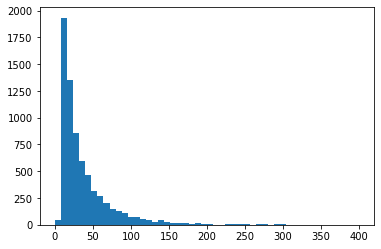

In [264]:
sentences=catagory10.review_customer.values.tolist()
print(max(len(l) for l in sentences))
print(sum(map(len, sentences))/len(sentences))
plt.hist([len(s) for s in sentences],range=(0,400), bins=50)

In [178]:
catagory1.shape

(18002, 10)

In [180]:
catagory2.shape

(6276, 10)

In [189]:
catagory3.shape

(3339, 10)

In [192]:
catagory4.shape

(14814, 10)

In [196]:
catagory5.shape

(2099, 10)

In [256]:
cata_na=catagory[catagory.catagory.isna()].shop.tolist()

In [258]:
catagory_na=pd.DataFrame
for num in cata_na:
    for cata in shop_list:
        now=cata[cata.shop==num]
        if catagory_na.empty:
            catagory_na=now
        else:
            catagory_na=catagory_na.append(now)
    
catagory_na.reset_index(drop=True,inplace=True)


525
37.165942078991556


(array([1.5850e+03, 2.7653e+04, 1.6487e+04, 9.7880e+03, 6.4800e+03,
        4.8080e+03, 3.7580e+03, 2.9110e+03, 2.3470e+03, 1.7970e+03,
        1.5340e+03, 1.2740e+03, 1.0340e+03, 8.2400e+02, 6.7700e+02,
        5.3100e+02, 4.7800e+02, 3.7000e+02, 3.5600e+02, 2.7700e+02,
        2.4800e+02, 2.2500e+02, 1.6800e+02, 1.6000e+02, 1.3800e+02,
        1.3200e+02, 1.0200e+02, 7.5000e+01, 7.5000e+01, 8.4000e+01,
        5.9000e+01, 5.4000e+01, 5.1000e+01, 5.2000e+01, 4.2000e+01,
        5.8000e+01, 6.9000e+01, 1.7400e+02, 3.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([  0.,   8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.,
         88.,  96., 104., 112., 120., 128., 136., 144., 152., 160., 168.,
        176., 184., 192., 200., 208., 216., 224., 232., 240., 248., 256.,
        264., 272., 280., 288., 296., 304., 312., 320., 328., 336., 344.,
        352., 360., 36

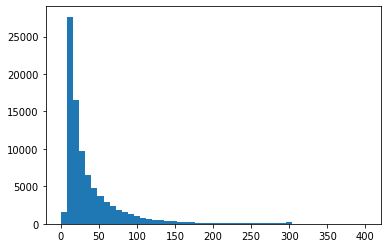

In [259]:
sentences=catagory_na.review_customer.values.tolist()
print(max(len(l) for l in sentences))
print(sum(map(len, sentences))/len(sentences))
plt.hist([len(s) for s in sentences],range=(0,400), bins=50)

,shop,name,date,star_flavor,star_volume,star_deliver,menu,review_customer,review_owner,img_name
30895,무치킨,ms**님,어제,5.0,5.0,5.0,2가지맛 순살치킨（양념＋후라이드）＋치킨무＋콜라 350mL/1,엄니가 정성스럽게\n준비해주시는\n식사보다도 무치킨 치킨이 맛있네요..\n쫄면도 정...,NaN,무치킨_0
30896,무치킨,st**님,3일 전,5.0,5.0,5.0,2가지맛 순살치킨（양념＋후라이드）＋치킨무＋콜라 350mL/1,말이 필요없다 그냥 시키는게 답이다,NaN,무치킨_1
30897,무치킨,ms**님,5일 전,5.0,5.0,5.0,2가지맛 순살치킨（양념＋후라이드）＋치킨무＋콜라 350mL/1,무쳤다 무쳤어 맛있어요!,감사합니다 🙏 극찬? 고맙습니다 🙏,무치킨_2
30898,무치킨,yu**님,2020년 12월 15일,5.0,5.0,5.0,2가지맛 순살치킨（양념＋후라이드）＋치킨무＋콜라 350mL/1,"찜만 눌러놓고 맨날 고민만했었는데 , 담에도 야식으로 주문해야겠어요.! 양도 많고...",고맙습니다 🙏 이렇게 사진리뷰까지 올려주셔서 감사합니다 ㅎㅎ,무치킨_3
30899,무치킨,co**님,2020년 12월 15일,5.0,5.0,5.0,생후라이드치킨＋치킨무＋콜라 350mL/1(추가메뉴(양념소스)),항상 자주 방문하는 곳입니다\n오늘은 집에서 먹고싶어 한번 배달 시켜봤는데\n양도 ...,ㅎㅎ언제나 고맙습니다 포장은 최대한 따뜻하게 드시라고 튀기자마자 후다닥 달려갑니다,무치킨_4
...,...,...,...,...,...,...,...,...,...,...
8244,호이차-회기역점,ga**님,2019년 11월 28일,5.0,5.0,5.0,"초코샌드위치/1,블랙밀크티＋펄 Black Milk Tea＋Pearl/1(HOT or...",맛도 좋고 서비스고 좋아요~,맛있게 드셨다니 넘 기쁘네요 😁 계속 노력하는 호이차가 되겠습니다. 추운 날씨 따뜻...,호이차-회기역점_414
8245,호이차-회기역점,ks**님,2019년 11월 23일,5.0,5.0,5.0,흑당버블티 BrownSugar Bubble Tea/1(HOT or ICE 선택(IC...,처음 시켜봤는데 맛있어요~~~~^^,정말 감사합니다 😁 늘 넉넉하게 드리는 호이차 회기역이 되겠습니다 추운날씨 건강 ...,NaN
8246,호이차-회기역점,hy**님,2019년 11월 21일,5.0,5.0,5.0,"햄치즈샌드위치/4,블랙밀크티 Black Milk Tea/1(HOT or ICE 선택...",잘먹었어용~~~~~,감사드려요 언제든 필요하신것은 요청사항에 써 주시고 행복햐 한주되세요 ~😆\n리뷰 ...,호이차-회기역점_416
8247,호이차-회기역점,do**님,2019년 11월 19일,5.0,5.0,5.0,초코스무디버블티 Choco Smoothie Bubble Tea/1(사이즈 선택(M)...,리뷰이벤트 참여하면 뭐 준다고 해서 개별사항에 적었는데ㅎ 딱 주문한 거만 왔어요. ...,고객님 정말 죄송합니다. ㅠㅠ 알아보니 저희 직원이 실수로 준비해 놓고 드리지 않...,호이차-회기역점_417


In [275]:
def check(catagory):
    print(catagory.shop.nunique())
    sentences=catagory.review_customer.values.tolist()
    print(max(len(l) for l in sentences))
    print(sum(map(len, sentences))/len(sentences))

In [276]:
check(catagory0)

164
632
42.66210799339778


In [277]:
check(catagory1)

26
386
46.95222753027441


In [278]:
check(catagory2)

19
370
41.91539196940727


In [284]:
for i in range(16):
    print(f'case {i}')
    check(globals()[f'catagory{i}'])
    print()

case 0
164
632
42.66210799339778

case 1
26
386
46.95222753027441

case 2
19
370
41.91539196940727

case 3
13
300
46.318358790056905

case 4
42
532
44.93506142837856

case 5
8
672
46.68651738923297

case 6
6
300
47.54485363550519

case 7
16
458
43.748584967750425

case 8
54
407
45.800233190827825

case 9
22
301
40.57457906295754

case 10
20
300
37.634481760277936

case 11
39
316
42.34701717798145

case 12
18
302
44.85760667903525

case 13
16
300
43.210967633741404

case 14
16
335
41.2715450310559

case 15
21
299
42.21983728578847



In [285]:
catagory6

,shop,name,date,star_flavor,star_volume,star_deliver,menu,review_customer,review_owner,img_name
0,썬더치킨-경희대점,sa**님,2020년 9월 8일,5.0,5.0,5.0,"파닭치킨/1(뼈or순살 선택(뼈),반마리 추가 선택(매운맛 양념치킨 반마리 추가),...",썬더치킨은 언제나 맞습니다!!!,NaN,썬더치킨-경희대점_0
1,썬더치킨-경희대점,ja**님,2020년 8월 27일,5.0,5.0,5.0,"반반치킨（크리스피 반＋양념 반）/1(뼈or순살 선택(뼈),사이드 추가 선택(마약떡튀...",맛잇고 양많거 좋아여,NaN,썬더치킨-경희대점_1
2,썬더치킨-경희대점,be**님,2020년 8월 20일,5.0,5.0,5.0,크리스피치킨/1(뼈or순살 선택(뼈)),배달도 빠르고 맛있어요 서비스 감자도 최고~,NaN,썬더치킨-경희대점_2
3,썬더치킨-경희대점,lw**님,2020년 8월 11일,5.0,5.0,5.0,"반반치킨（크리스피 반＋양념 반）/1(뼈or순살 선택(뼈),반마리 추가 선택(간장치킨...",비도 많이 왔는데 배달 빨리 해주셔서 감사했습니다 물론 치킨이랑 감자튀김도 더할 나...,NaN,썬더치킨-경희대점_3
4,썬더치킨-경희대점,na**님,2020년 8월 6일,5.0,5.0,5.0,"닭다리 반반 8조각（후라이드 반＋양념 반）/1(뼈or순살 선택(뼈),소스 추가 선택...",닭다리 너무 맛있고요\n감자튀김이 진짜 너무 맛있어요 감튀 강추입니다,NaN,썬더치킨-경희대점_4
...,...,...,...,...,...,...,...,...,...,...
1054,도야족발-중곡본점,70**님,2020년 2월 10일,5.0,5.0,5.0,불족발/1(사이즈 선택(中)),와우~~~~ 족발집 중에 최고인거 같아요\n집에서 조금 멀어서 음식이 식을까 걱정...,감사합니다 기억나요 껍대기 위주로 달라고하셔서 사실 그거 ..2족이나 들어간건 비밀...,도야족발-중곡본점_495
1055,도야족발-중곡본점,bu**님,2020년 2월 9일,5.0,5.0,5.0,도야보쌈/1(사이즈 선택(小)),배달시켜먹어본 족발중 최고였어요!!♡\n돼지냄새도 안나고 쫄깃쫄깃 너무맛있어요~~\...,감사합니다 ㅎㅎㅎ 항상 신선한 당일족으로만 삶아서 쫄깃 쫄깃 하실꺼에요 ㅎㅎㅎ \n...,NaN
1056,도야족발-중곡본점,손님,2020년 2월 8일,5.0,5.0,5.0,도야보쌈/1(사이즈 선택(小)),"보쌈 먹어봤는데, 요즘 되게 부드럽네요 육질이나 육즙이나 모든 면에서 최고라 생각합...",저희 도야족발주문해주셔서 감사합니다 ㅎㅎ 보쌈 맛나죠 이번에 고기도 업그레이드 해서...,NaN
1057,도야족발-중곡본점,na**님,2020년 2월 4일,2.0,1.0,3.0,반반족발/1(메뉴 선택(반반 앞발)),전에 시켜먹었을때 맛있게 먹었던 기억이 있어서 일부러 여기서 시켰는데.. 주인이 바...,죄송합니다..고객님...주인이 바낀건아니구요..ㅠㅠ 말슴주신부분에대해 변명안하겠습니...,도야족발-중곡본점_498


In [287]:
def extract(notice):
    notice_clean=re.sub('[^ㄱ-하-1가-힣a-zA-Z0-9]',' ',notice)
    notice_clean=okt.nouns(notice)
    return notice_clean

In [290]:
a=catagory15.review_customer.map(lambda x : extract(x))

In [291]:
all_a=sum(a,[])

In [292]:
Counter(all_a).most_common(100)

[('맛', 1544),
 ('배달', 1298),
 ('족발', 687),
 ('양도', 658),
 ('주문', 492),
 ('또', 487),
 ('진짜', 476),
 ('양', 450),
 ('막국수', 442),
 ('정말', 363),
 ('좀', 332),
 ('다음', 324),
 ('항상', 315),
 ('더', 251),
 ('처음', 249),
 ('리뷰', 247),
 ('여기', 230),
 ('사진', 223),
 ('최고', 212),
 ('시간', 211),
 ('고기', 207),
 ('서비스', 200),
 ('오늘', 193),
 ('반찬', 184),
 ('요', 181),
 ('조금', 181),
 ('때', 177),
 ('역시', 175),
 ('떡볶이', 175),
 ('것', 170),
 ('자주', 169),
 ('보쌈', 164),
 ('김치', 151),
 ('음식', 147),
 ('집', 145),
 ('습', 144),
 ('생각', 144),
 ('국물', 139),
 ('요청', 129),
 ('밥', 125),
 ('담', 119),
 ('치킨', 115),
 ('포장', 113),
 ('제', 113),
 ('곳', 109),
 ('이벤트', 109),
 ('안', 107),
 ('먹기', 106),
 ('소스', 106),
 ('추가', 106),
 ('그냥', 104),
 ('짐', 103),
 ('사장', 102),
 ('가격', 101),
 ('아주', 99),
 ('완전', 98),
 ('사항', 98),
 ('냄새', 98),
 ('닭', 97),
 ('파스타', 97),
 ('존맛', 95),
 ('정도', 93),
 ('와플', 93),
 ('번창', 91),
 ('비', 87),
 ('불', 86),
 ('앞', 85),
 ('만', 85),
 ('햄', 85),
 ('추천', 82),
 ('매콤', 82),
 ('쭈꾸미', 82),
 ('배', 81),
 ('떡', 79),
